In [1]:
!wget "https://storage.googleapis.com/kagglesdsdata/datasets%2F134983%2F320651%2Fmediacompany.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594228428&Signature=iIn8PdUW0KjdKT3jLgm6WrEqo5UI2g3F8SHKPX9X2n%2FXWKDOIQAtcJ6Ww2BO3ladE9g6SmiLgGYvuKXZQB8hEuExkxQQCEl%2FhFCT7139d1CjBWBBFjb6Hf%2Fs2MlY6LepyQKiY%2BBdagPfst5v8LetSFhGLFmUmYOK5O8GnftgwtUNuMmij9DrPLMotvPrddiNRvNy3TqFAIvF21l2oznjxUVvH5%2BAGbs4%2Bht7LnijapWmlgJvIpuT0pi117puZyejr%2FIVD9UXTbw0qeDYp9uxDJZELzR5%2Bix5PtHPIApNz%2FdjSZOxe6%2BhYGaQm%2FLvczgz%2BIYFzF7UJRhJ94%2F7oqg%2BdQ%3D%3D"

The name is too long, 501 chars total.
Trying to shorten...
New name is datasets%2F134983%2F320651%2Fmediacompany.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594228428&Signature=iIn8PdUW0KjdKT3jLgm6WrEqo5UI2g3F8SHKPX9X2n%2FXWKDOIQAtcJ6Ww2BO3ladE9g6SmiLgGYvuKXZQB8hEuExkxQ.
--2020-07-08 04:53:26--  https://storage.googleapis.com/kagglesdsdata/datasets%2F134983%2F320651%2Fmediacompany.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1594228428&Signature=iIn8PdUW0KjdKT3jLgm6WrEqo5UI2g3F8SHKPX9X2n%2FXWKDOIQAtcJ6Ww2BO3ladE9g6SmiLgGYvuKXZQB8hEuExkxQQCEl%2FhFCT7139d1CjBWBBFjb6Hf%2Fs2MlY6LepyQKiY%2BBdagPfst5v8LetSFhGLFmUmYOK5O8GnftgwtUNuMmij9DrPLMotvPrddiNRvNy3TqFAIvF21l2oznjxUVvH5%2BAGbs4%2Bht7LnijapWmlgJvIpuT0pi117puZyejr%2FIVD9UXTbw0qeDYp9uxDJZELzR5%2Bix5PtHPIApNz%2FdjSZOxe6%2BhYGaQm%2FLvczgz%2BIYFzF7UJRhJ94%2F7oqg%2BdQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('data.csv')
df.drop('Unnamed: 7', axis=1, inplace=True)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [5]:
#Derived -days since show is running

from datetime import date
d0 = date(2017, 2, 28)
d1 = df.Date
delta = d1.dt.date - d0
df['day'] = delta
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [6]:
df.day = df.day.astype(str)
df.day = df.day.map(lambda x: x[0:2])
df.day = df.day.astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


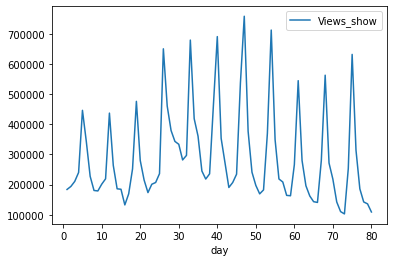

In [7]:
df.plot.line(x='day', y='Views_show')

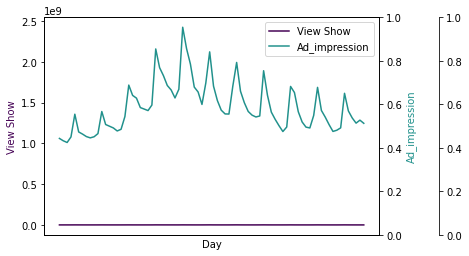

In [10]:
#Views_show vs Ad_impressions
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View Show')
par1.set_ylabel('Ad_impression')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

p1, = host.plot(df.day, df.Views_show, color=color1, label='View Show')
p2, = host.plot(df.day, df.Ad_impression, color=color2, label='Ad_impression')

lns = [p1,p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())